# Simulating a standard normal distribution
 
We are asked to simulate a normal distribution using a bernoulli distribution. We can achieve this by carrying out the following experiment. First, we simulate a binomial by sampling from the bernoulli $n$ times. For a large number of trials $n$, the normal distribution is roughly equivalent to a binomial. More mathematically, for a large $n$, $\text{Binomial}(n, p) \approx \mathcal{N}(np, np(1-p)$.  To get a more accurate simulation, we can increase the number of trials $n$. This is however computationally expensive. To draw a sample from the normal, we draw a sample from the binomial $x \sim \text{Binomial}(n, p)$ and return $y = \dfrac{x - \mu}{\sigma^2}$ where $\mu$ is the mean of the binomial distribution, which is $n\cdot p$ and $\sigma^2$ is the variance of the binomial which is $n \cdot p \cdot (1 - p)$.


In [2]:
from common import bernoulli
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 15, 10


def binomial(trials: int, p: float = 0.5) -> int:
    """
    :param trials: Performs a bernoulli experiment `trials` number of times
    :param p: probability of success for each bernoulli
    :return: # of successes in `trials`
    """
    return sum([bernoulli(p) for _ in range(trials)])


def standard_normal(trials: int = 10000):
    p = 0.5  # probability of success of the bernoulli trial.
    sample = binomial(trials, p)
    mean, variance = trials * p, trials * p * (1 - p)
    return (sample - mean) / variance


(array([   35.,   581.,  3945., 16885., 29752., 29167., 15505.,  3609.,
          483.,    38.]),
 array([-0.264 , -0.2108, -0.1576, -0.1044, -0.0512,  0.002 ,  0.0552,
         0.1084,  0.1616,  0.2148,  0.268 ]),
 <a list of 10 Patch objects>)

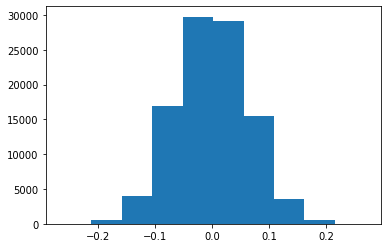

In [6]:
n_experiments = 100000
samples = [standard_normal(trials=1000) for _ in range(n_experiments)]
plt.hist(samples)